In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
print("Başlangıç boyutu:", data.shape)

Başlangıç boyutu: (114000, 21)


In [4]:
print("Info: ", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
print("Description: ", data.describe().T)

Description:                       count           mean            std     min  \
Unnamed: 0        114000.0   56999.500000   32909.109681   0.000   
popularity        114000.0      33.238535      22.305078   0.000   
duration_ms       114000.0  228029.153114  107297.712645   0.000   
danceability      114000.0       0.566800       0.173542   0.000   
energy            114000.0       0.641383       0.251529   0.000   
key               114000.0       5.309140       3.559987   0.000   
loudness          114000.0      -8.258960       5.029337 -49.531   
mode              114000.0       0.637553       0.480709   0.000   
speechiness       114000.0       0.084652       0.105732   0.000   
acousticness      114000.0       0.314910       0.332523   0.000   
instrumentalness  114000.0       0.156050       0.309555   0.000   
liveness          114000.0       0.213553       0.190378   0.000   
valence           114000.0       0.474068       0.259261   0.000   
tempo             114000.0     122

In [ ]:
# # track_id yoksa track_name + artists kombinasyonu kullanılır
# data = data.drop_duplicates(subset=["artists", "track_name"], keep="first")

# print("Duplication sonrası:", data.shape)

In [6]:
rows_with_null = data[data.isnull().any(axis=1)]
rows_with_null

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [7]:
data[data['track_id'].duplicated()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.5770,...,-7.544,1,0.0438,0.2380,0.860000,0.0571,0.8430,90.522,4,afrobeat
2155,2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9000,...,-3.674,1,0.0499,0.1160,0.000017,0.1190,0.5990,104.655,4,alt-rock
3000,3000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.5210,...,-9.461,1,0.0329,0.0678,0.149000,0.1230,0.3370,85.012,4,alternative
3002,3002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.5680,...,-5.509,0,0.0300,0.0484,0.000417,0.2860,0.3700,93.986,4,alternative
3003,3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.8070,...,-2.810,1,0.0336,0.0495,0.017700,0.1010,0.3980,124.053,4,alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113572,113572,1saXUvvFlAQaefZUFVmhCn,Bethel Music;Paul McClure,We Will Not Be Shaken (Live),Jesus We Love You - Live,53,415079,False,0.253,0.3590,...,-8.482,1,0.0317,0.3100,0.000006,0.3590,0.1150,115.348,3,world-music
113605,113605,1Q5jFp1g2Ns4gBsHRpcqhu,Bethel Music;Jenn Johnson;Michaela Gentile,Simple,In The Ordinary - Spontaneous,50,174971,False,0.490,0.2310,...,-13.968,1,0.0265,0.6070,0.000000,0.0859,0.0904,103.958,4,world-music
113617,113617,71dLJx3qHOTQMTvvoE2dmd,Bethel Music;Amanda Cook,Peace,King of My Heart,48,330840,False,0.515,0.0736,...,-15.492,1,0.0310,0.9750,0.000261,0.0820,0.0684,109.964,4,world-music
113619,113619,6OG5TBCmuTOuWCzSGsETrE,Bethel Music;Brian Johnson;Jenn Johnson,Simple,Simple,48,351236,False,0.624,0.1240,...,-11.191,1,0.0280,0.9170,0.000000,0.1200,0.2060,78.014,4,world-music


In [8]:
data[data['track_id'] == '0CDucx9lKxuCZplLXUz0iX']

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1874,1874,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,...,-7.544,1,0.0438,0.238,0.86,0.0571,0.843,90.522,4,afrobeat
1925,1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,...,-7.544,1,0.0438,0.238,0.86,0.0571,0.843,90.522,4,afrobeat


In [9]:
data = data.drop_duplicates(subset=["track_id"], keep="first")

print("Duplication sonrası:", data.shape)

Duplication sonrası: (89741, 21)


In [10]:
print(data.isna().sum())

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [13]:
cols_to_drop = [
    "track_id",
    "track_name",
    "album_name",
    "explicit",
    "artists"        # binary ama istersen bırakabiliriz
]

data = data.drop(columns=[c for c in cols_to_drop if c in data.columns])

In [14]:
print(data.isna().sum())

Unnamed: 0          0
popularity          0
duration_ms         0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [16]:
data["track_genre"] = data["track_genre"].astype("category")


In [17]:
# duration_ms = 0 olan şarkıları sil
data = data[data["duration_ms"] > 0]

# loudness <-40 dB ise muhtemelen hata
data = data[data["loudness"] > -40]

# tempo 0 olabilir → çok azı var, drop
data = data[data["tempo"] > 0]

print("Temiz veri boyutu:", data.shape)

Temiz veri boyutu: (89561, 16)


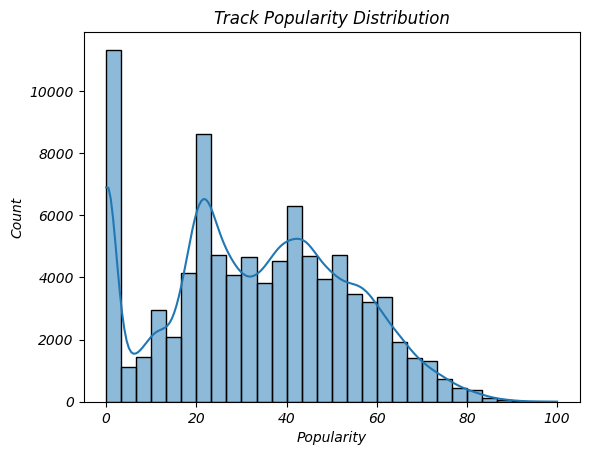

In [18]:
# Popülarite dağılımı histogramla görselleştirildi.
sns.histplot(data['popularity'], bins=30, kde=True)
plt.title("Track Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

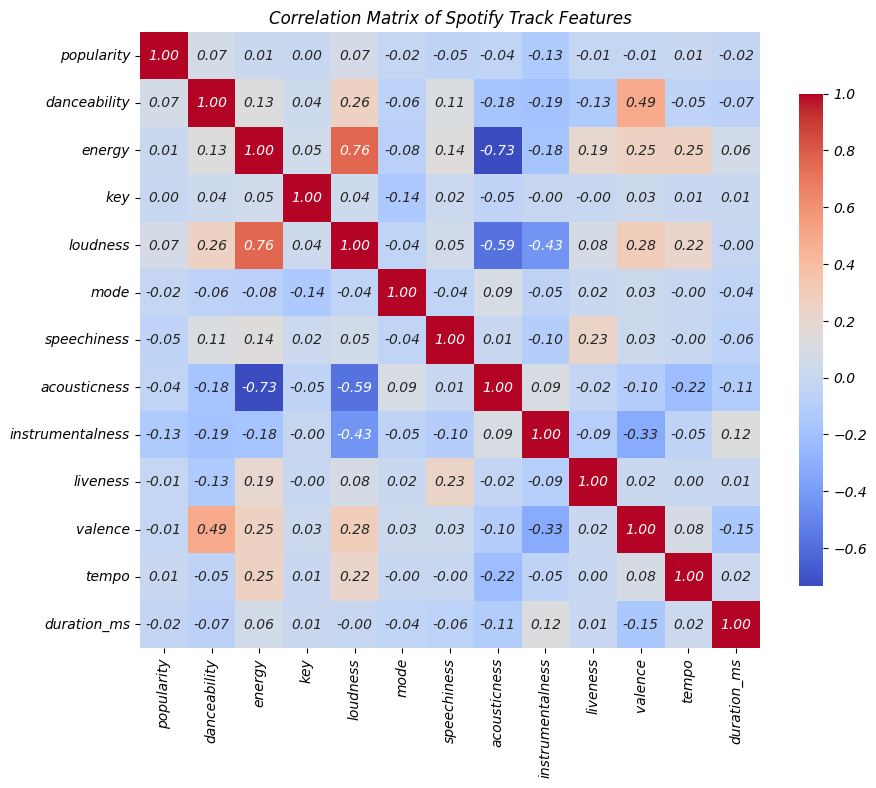

In [19]:
# Korelasyon matrisi hesaplandı ve ısı haritası ile görselleştirildi.
numeric_cols = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms']
corr_table_data = data[numeric_cols]
corr_table = corr_table_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_table, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Spotify Track Features')
plt.show()

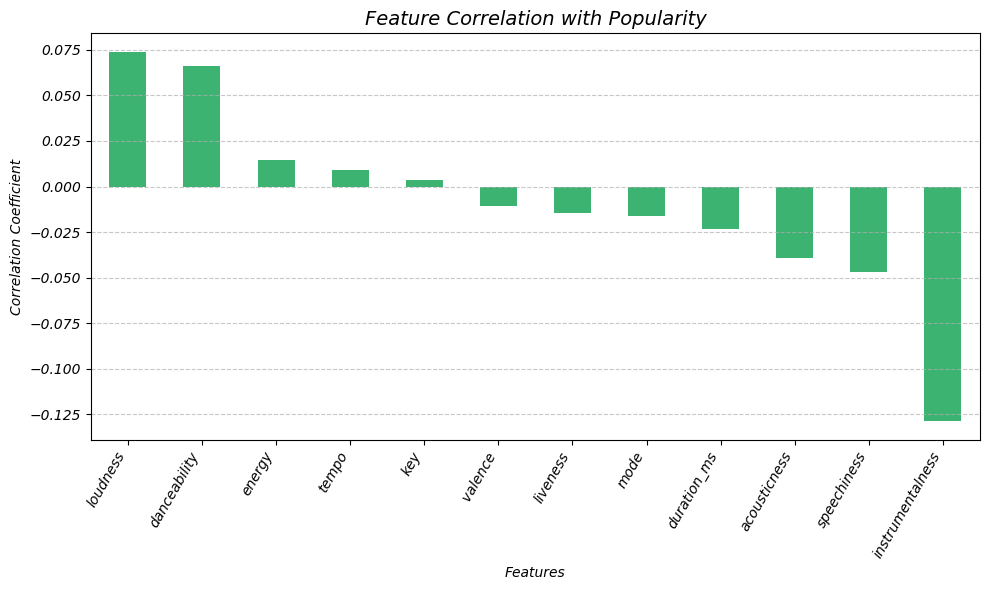

In [20]:
# Popülarite ile diğer özellikler arasındaki korelasyonlar sıralandı ve görselleştirildi.
sorted_corr = corr_table['popularity'].sort_values(ascending=False)
sorted_corr =sorted_corr.drop('popularity', errors='ignore')

# Korelasyonları görselleştirme
plt.figure(figsize=(10, 6))
sorted_corr.plot(kind='bar', color='mediumseagreen')

plt.title('Feature Correlation with Popularity', fontsize=14)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [23]:
data = data.drop(columns=["Unnamed: 0"], axis=1)

In [24]:
data.to_csv("clean_data.csv")